In [1]:
import pandas as pd

In [2]:
pfizer_score = pd.read_csv('nrclexext_pfizer.csv')

In [3]:
def date(x):
    return x.split()[0]

In [4]:
pfizer_score['Date'] = pfizer_score.date.apply(date)

In [5]:
pfizer_score = pfizer_score.drop(columns = ['date'])

# Emotion analysis for a single day

In [6]:
single_day = pfizer_score[pfizer_score['Date'] == '2021-03-02'].reset_index()

In [7]:
emotion = single_day.sum()[3:-2]

In [8]:
emotion

Anger           208
Anticipation    403
Disgust          80
Fear            362
Joy             156
Sadness         266
Surprise        149
Trust           494
dtype: object

In [9]:
emotion.index

Index(['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness',
       'Surprise', 'Trust'],
      dtype='object')

In [10]:
emotion.values

array([208, 403, 80, 362, 156, 266, 149, 494], dtype=object)

In [11]:
y =  str(emotion[emotion == max(emotion.values)])
y.split('\n')[0]

'Trust    494'

In [12]:
emotion_name  = y.split('\n')[0].split()[0]
score = y.split('\n')[0].split()[1]
print("Dominant emotion is "+ emotion_name+ " and score is " + score )

Dominant emotion is Trust and score is 494


## Plotting

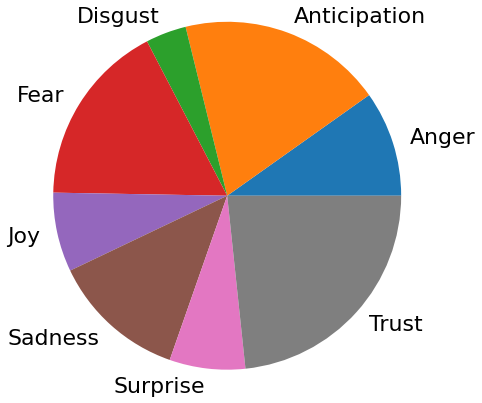

In [13]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.pie(emotion.values, labels = emotion.index, radius = 2)
plt.savefig('foo.jpg', bbox_inches='tight')
plt.show() 

## Top News

In [14]:

pfizer_score['score_sum'] = pfizer_score.Positive+pfizer_score.Negative+pfizer_score.Anger+pfizer_score.Anticipation+pfizer_score.Disgust+pfizer_score.Fear+pfizer_score.Joy+pfizer_score.Sadness+pfizer_score.Surprise+pfizer_score.Trust
x = pfizer_score.sort_values(by='score_sum', ascending=False)[:50].headlines.values
with open('topnews.txt', 'w') as f:
    for i in range(50):
        f.write(x[i][:150]+".....\n\n")
    
f.close()

## Historical Price 

[*********************100%***********************]  1 of 1 completed


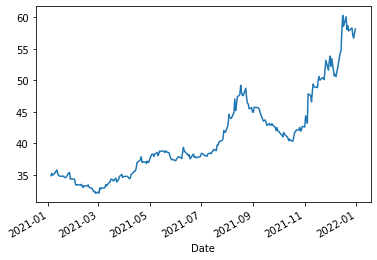

In [15]:
import yfinance as yf

# Get the data for the stock AAPL
price_data = yf.download('PFE','2021-01-01','2022-01-01')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
price_data['Adj Close'].plot()
plt.show()

## Historical Emotion Score

In [16]:
# And an emotion score graph will be printed
historical_emotion = pfizer_score.groupby('Date').sum()

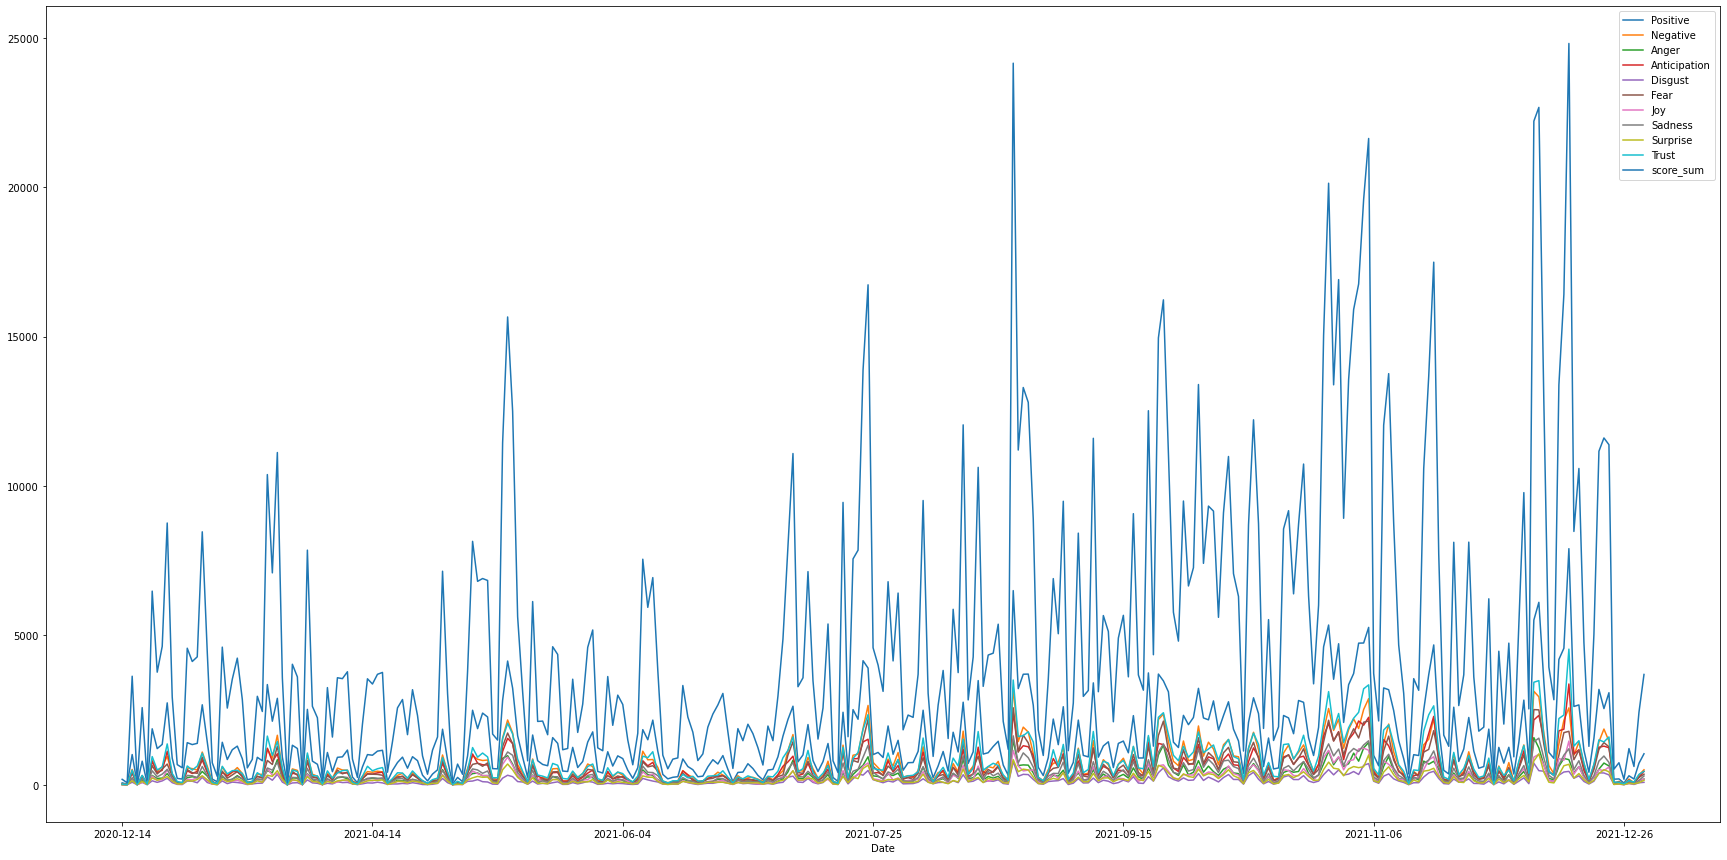

In [17]:
historical_emotion.plot(figsize = (30, 15))
plt.savefig('historical_emo.jpg', bbox_inches='tight')

<AxesSubplot:xlabel='Date'>

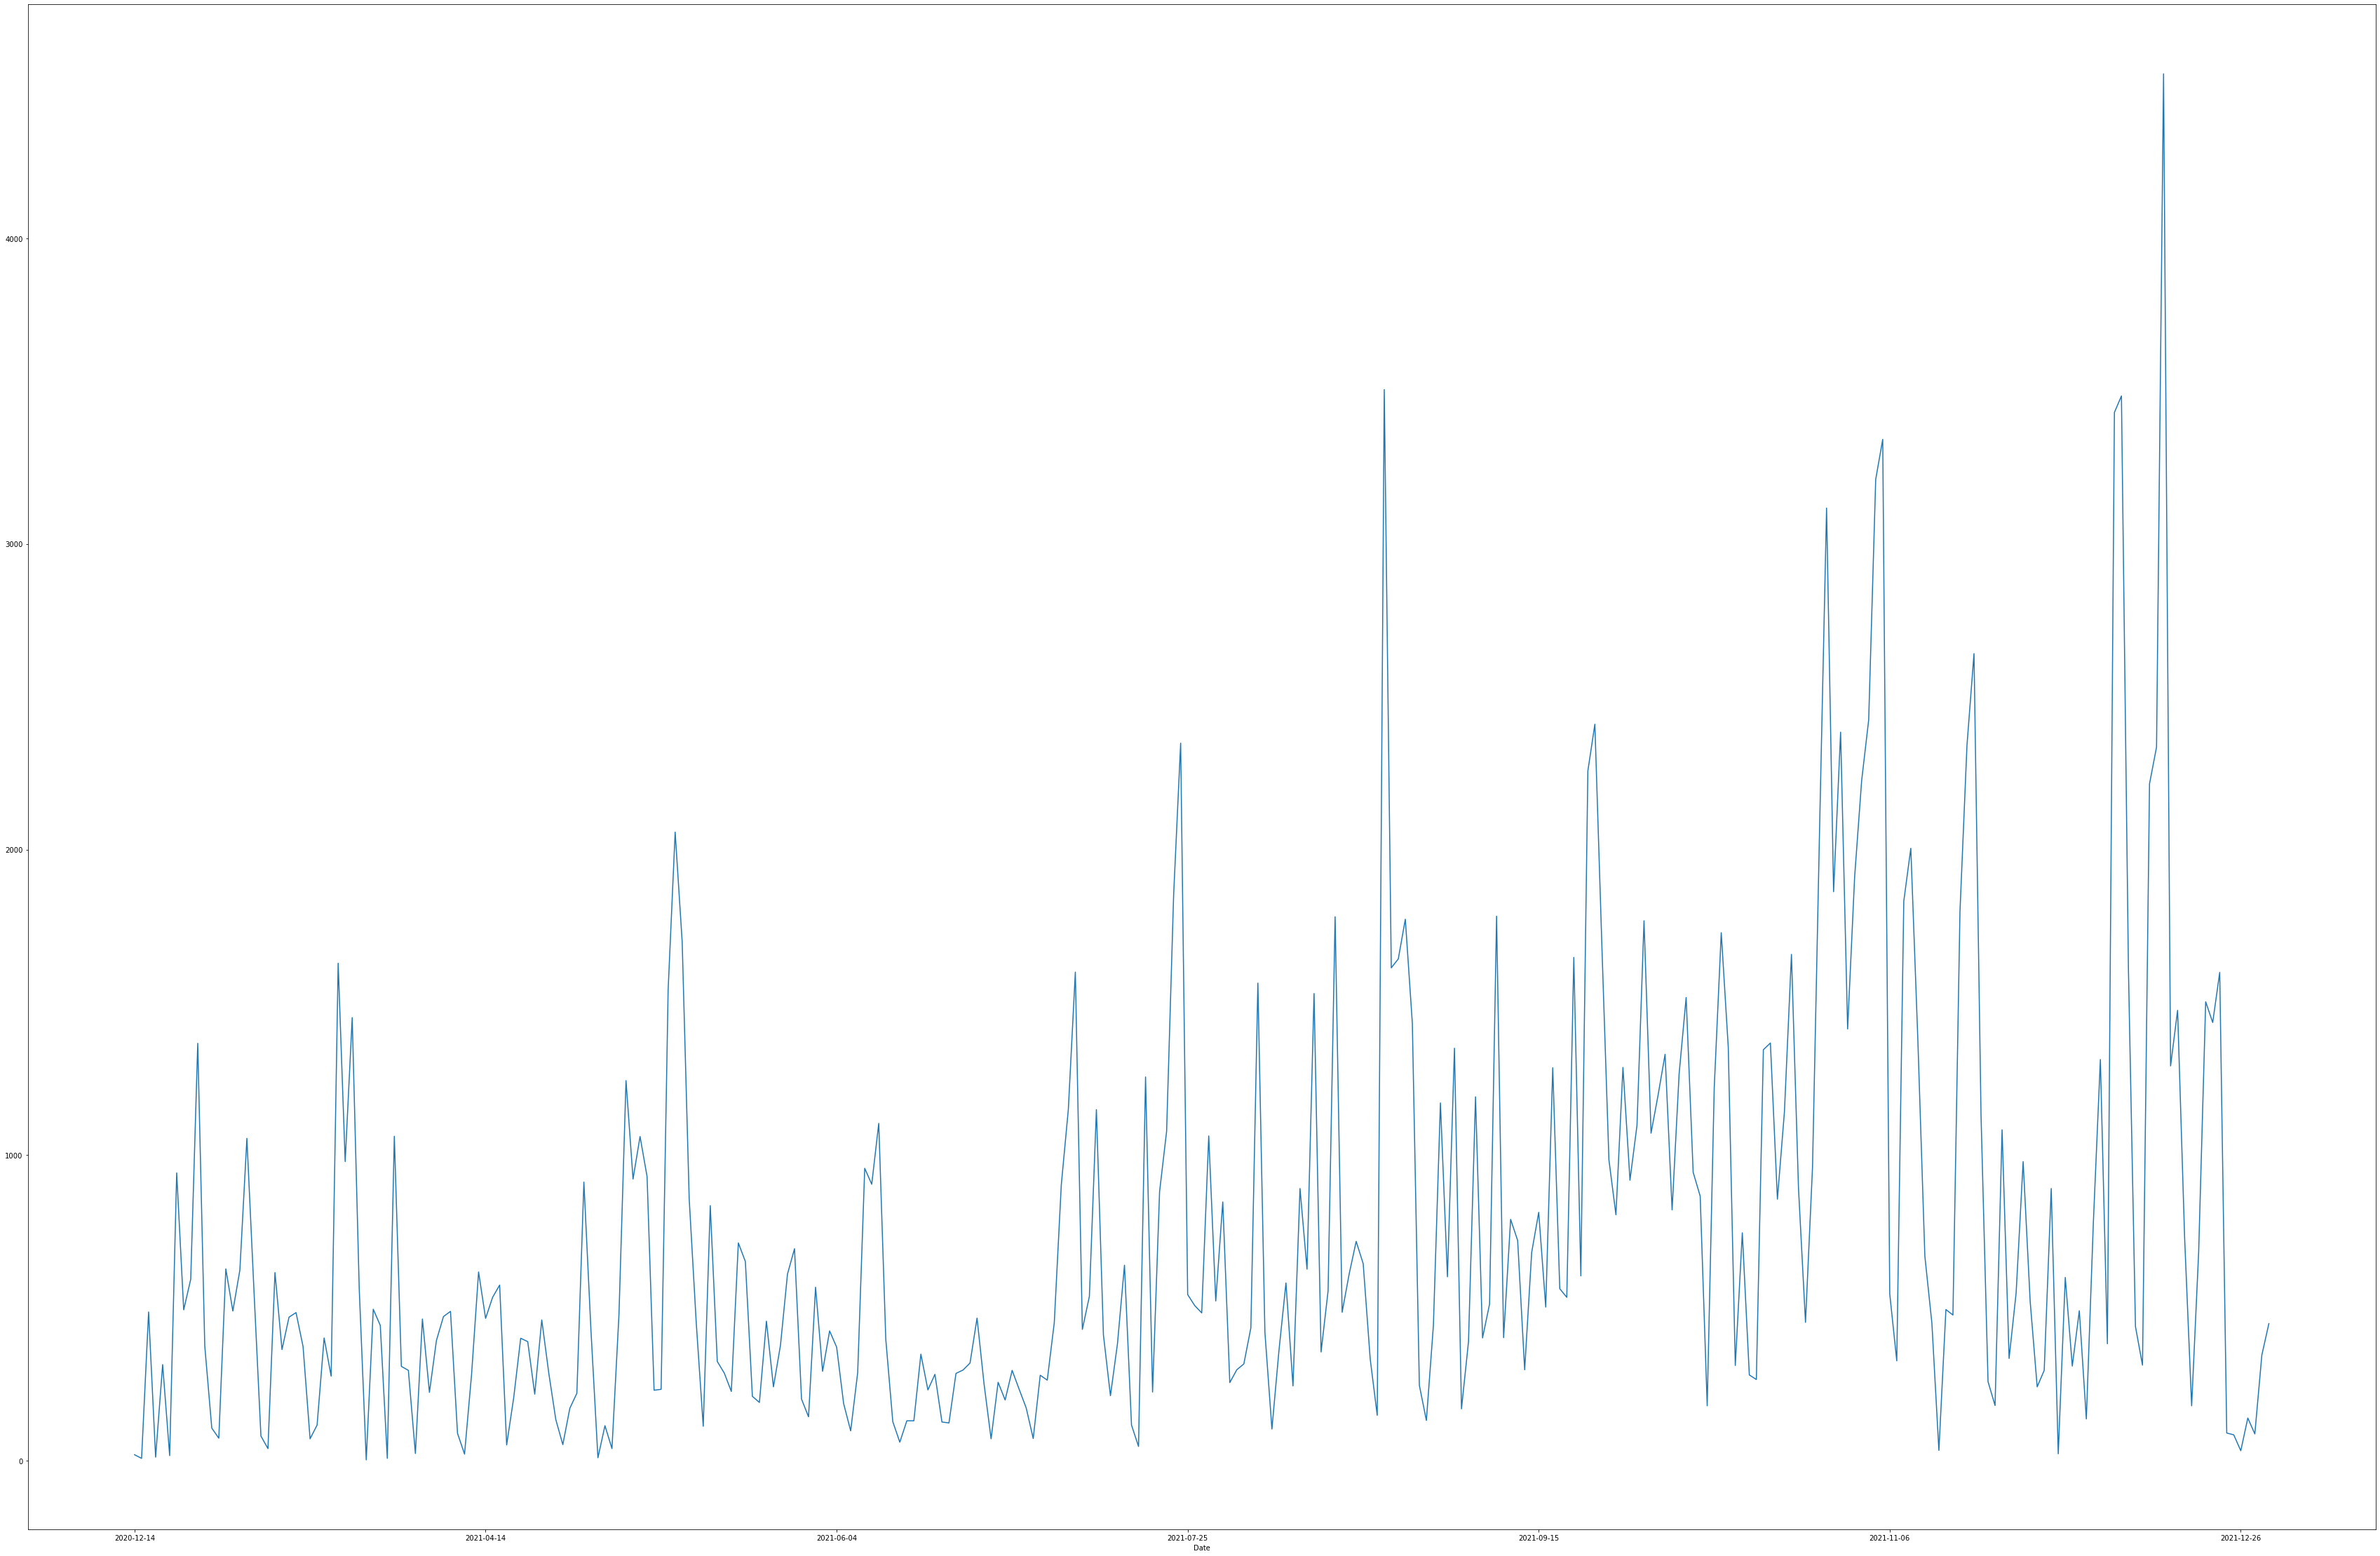

In [18]:
historical_emotion.Trust.plot(figsize = (60, 40))

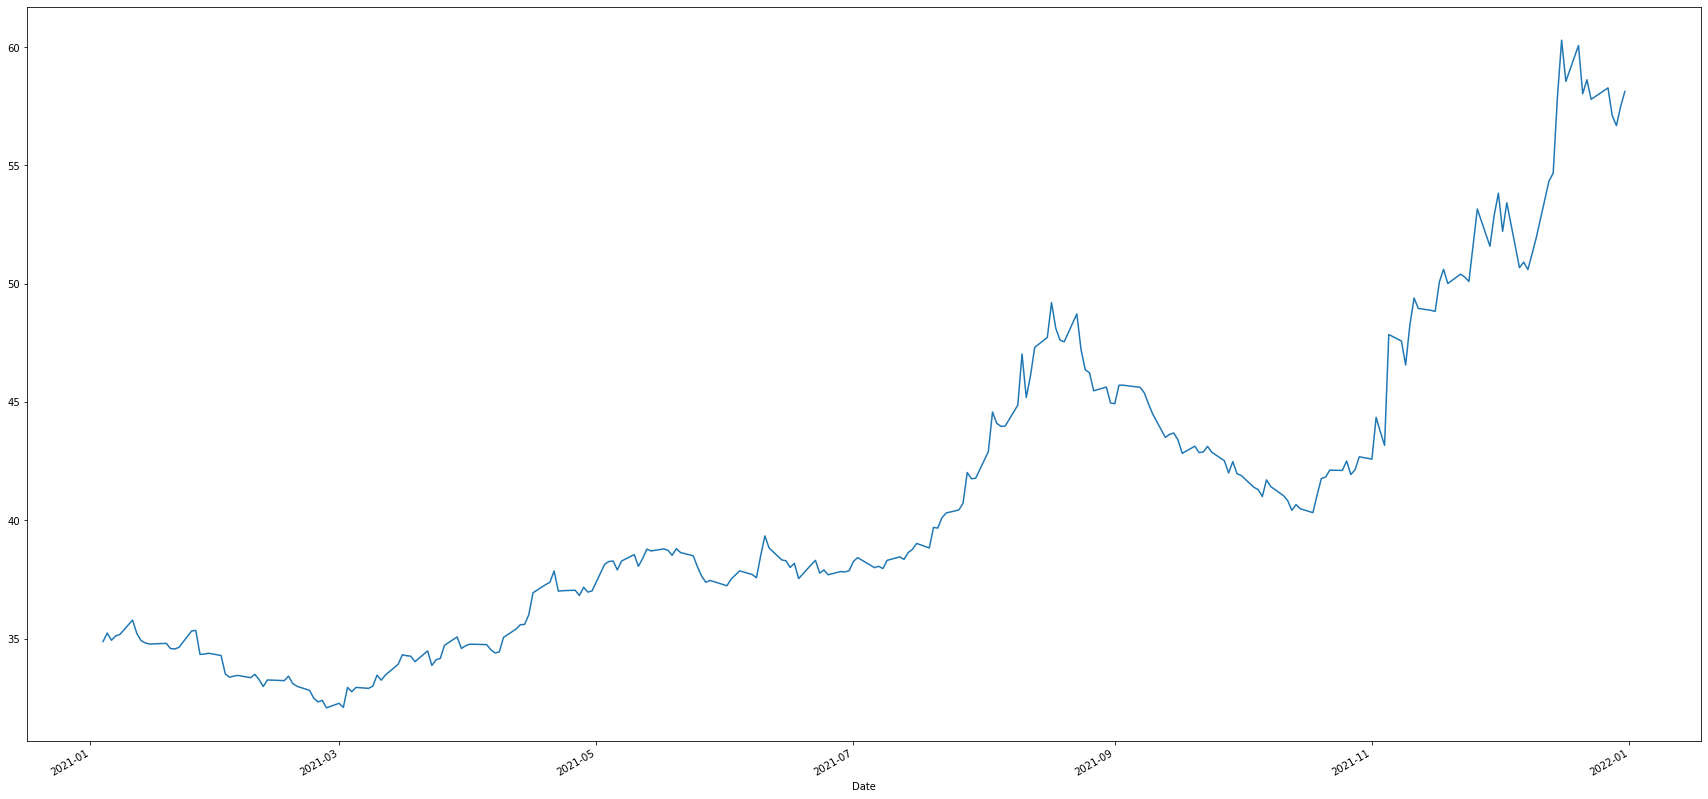

In [19]:
price_data['Adj Close'].plot(figsize = (30, 15))
plt.savefig('historical_price.jpg', bbox_inches='tight')

## Date preparation


In [20]:
print(historical_emotion.index)
print(price_data.index)

Index(['2020-12-14', '2021-02-24', '2021-02-25', '2021-02-26', '2021-02-27',
       '2021-02-28', '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
       ...
       '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
       '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30'],
      dtype='object', name='Date', length=305)
DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)


In [21]:
historical_emotion.index = pd.to_datetime(historical_emotion.index)

In [22]:
historical_emotion.index

DatetimeIndex(['2020-12-14', '2021-02-24', '2021-02-25', '2021-02-26',
               '2021-02-27', '2021-02-28', '2021-03-01', '2021-03-02',
               '2021-03-03', '2021-03-04',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=305, freq=None)

In [23]:
merged_data = price_data.join(historical_emotion)

In [24]:
clean_data = merged_data.dropna()

In [25]:
clean_data

,Open,High,Low,Close,Adj Close,Volume,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,score_sum
Date,,,,,,,,,,,,,,,,,
2021-02-24,33.869999,34.049999,33.669998,33.750000,32.321190,30686100,17.0,12.0,2.0,3.0,1.0,11.0,3.0,7.0,1.0,8.0,65.0
2021-02-25,33.820000,34.110001,33.540001,33.820000,32.388222,37506100,1010.0,512.0,200.0,393.0,85.0,414.0,161.0,237.0,133.0,487.0,3632.0
2021-02-26,33.840000,33.900002,33.360001,33.490002,32.072197,41462800,27.0,9.0,6.0,6.0,1.0,7.0,3.0,5.0,4.0,12.0,80.0
2021-03-01,33.590000,33.930000,33.509998,33.689999,32.263725,30407800,1872.0,818.0,310.0,783.0,132.0,639.0,289.0,468.0,227.0,942.0,6480.0
2021-03-02,33.680000,33.889999,33.500000,33.509998,32.091351,27670400,1209.0,441.0,208.0,403.0,80.0,362.0,156.0,266.0,149.0,494.0,3768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,59.820000,60.080002,58.310001,58.709999,57.795662,39203200,3080.0,1461.0,628.0,1238.0,329.0,1270.0,593.0,749.0,435.0,1598.0,11381.0
2021-12-27,58.849998,59.380001,58.230000,59.200001,58.278034,27362600,300.0,189.0,74.0,98.0,45.0,155.0,44.0,119.0,46.0,140.0,1210.0
2021-12-28,59.049999,59.450001,57.080002,58.009998,57.106567,36901700,191.0,70.0,27.0,76.0,10.0,53.0,30.0,36.0,30.0,88.0,611.0


# Correlation

In [26]:
from scipy.stats import pearsonr
corr, _ = pearsonr(clean_data.Positive, clean_data.Negative)
corr

0.953179027654715

In [27]:
emo_col = clean_data.columns[6:16]

def correlation(data):
    corr_dictionary = {}
    for i in range(len(emo_col)):
        corr, _ = pearsonr(clean_data[emo_col[i]].values, data)
        corr_dictionary.update({'Price vs ' +emo_col[i]: corr})
    return corr_dictionary

In [28]:
correlation(clean_data['Adj Close'].values)

{'Price vs Positive': 0.3420170016965198,
 'Price vs Negative': 0.33192138662594484,
 'Price vs Anger': 0.29980119433081287,
 'Price vs Anticipation': 0.38494391108602,
 'Price vs Disgust': 0.3520402804296431,
 'Price vs Fear': 0.32696636717043726,
 'Price vs Joy': 0.359033478860898,
 'Price vs Sadness': 0.32815382666035253,
 'Price vs Surprise': 0.30192353286872664,
 'Price vs Trust': 0.35884915346554297}

- There is alwasys a positive correlation between Emotions
- As longest articles have more emotion score (in each emotions) and short article have less score (~ 80 percent)
- But Related emotion have morre correlation (>90 percent) e.g. Joy and Trust have 0.95 emotion score

In [29]:
# All the emotion scores are strongly correlated with each other
# so scores are simillar in each days
# and their overall correlation with the price is .34
# Not a good insight, random output

In [30]:
clean_data['price_change'] =  clean_data['Adj Close'].shift(-1) - clean_data['Adj Close']
clean_data['percentage_change'] = clean_data['price_change']/clean_data['Adj Close']*100

C:\Users\abrar\AppData\Local\Temp\ipykernel_19216\3291538848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['price_change'] =  clean_data['Adj Close'].shift(-1) - clean_data['Adj Close']
C:\Users\abrar\AppData\Local\Temp\ipykernel_19216\3291538848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['percentage_change'] = clean_data['price_change']/clean_data['Adj Close']*100


In [31]:
clean_data[['Adj Close', 'price_change', 'percentage_change']]

,Adj Close,price_change,percentage_change
Date,,,
2021-02-24,32.321190,0.067032,0.207393
2021-02-25,32.388222,-0.316025,-0.975740
2021-02-26,32.072197,0.191528,0.597179
2021-03-01,32.263725,-0.172375,-0.534268
2021-03-02,32.091351,0.842743,2.626075
...,...,...,...
2021-12-23,57.795662,0.482372,0.834617
2021-12-27,58.278034,-1.171467,-2.010134
2021-12-28,57.106567,-0.423298,-0.741242


In [32]:
clean_data = clean_data.dropna()

In [33]:
correlation(clean_data['Adj Close'].values)

{'Price vs Positive': 0.3538528110768084,
 'Price vs Negative': 0.34272968447282304,
 'Price vs Anger': 0.31088582060754133,
 'Price vs Anticipation': 0.3954917138527834,
 'Price vs Disgust': 0.3637075448720999,
 'Price vs Fear': 0.3387060934794842,
 'Price vs Joy': 0.36952894263276903,
 'Price vs Sadness': 0.33792303664701806,
 'Price vs Surprise': 0.3116790257073678,
 'Price vs Trust': 0.37142624239804467}

In [34]:
correlation(clean_data['price_change'].values)

{'Price vs Positive': 0.1756767950319768,
 'Price vs Negative': 0.16300762661632232,
 'Price vs Anger': 0.15407853080945977,
 'Price vs Anticipation': 0.19362393205547976,
 'Price vs Disgust': 0.1756743811296371,
 'Price vs Fear': 0.1552141661271838,
 'Price vs Joy': 0.20862124220821737,
 'Price vs Sadness': 0.14261021395399756,
 'Price vs Surprise': 0.13703184807312963,
 'Price vs Trust': 0.2099603551728167}

In [35]:
correlation(clean_data['percentage_change'].values)

{'Price vs Positive': 0.15280251858444044,
 'Price vs Negative': 0.1481972682911774,
 'Price vs Anger': 0.1424841517923704,
 'Price vs Anticipation': 0.1713958121346167,
 'Price vs Disgust': 0.16473886840716562,
 'Price vs Fear': 0.14132045559730289,
 'Price vs Joy': 0.18734600080011066,
 'Price vs Sadness': 0.12918689901577465,
 'Price vs Surprise': 0.11997503712557528,
 'Price vs Trust': 0.1887369808115813}

In [36]:
corr, _ = pearsonr(clean_data['price_change'].values, clean_data['percentage_change'].values)

In [37]:
corr

0.9898762299914042

# No Progress in COrr, as less data, 

# Shifting Data

In [38]:
def shift_data(x):

    def s_correlation(data):
        corr_dictionary = {}
        for i in range(len(emo_col)):
            corr, _ = pearsonr(shift_df[emo_col[i]].values, data)
            corr_dictionary.update({'Price vs ' +emo_col[i]: corr})
        return corr_dictionary

    shift_df = clean_data
    shift_df['shifted_close'] = shift_df['Adj Close'].shift(x)
    shift_df = shift_df.dropna()
    return s_correlation(shift_df['shifted_close'].values)




In [43]:
#Change the data in below fucntion

In [39]:
shift_data(-15)
# affect of emotion score on price after 10 days

C:\Users\abrar\AppData\Local\Temp\ipykernel_19216\4257831022.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shift_df['shifted_close'] = shift_df['Adj Close'].shift(x)


{'Price vs Positive': 0.28959676217525954,
 'Price vs Negative': 0.2961930890293218,
 'Price vs Anger': 0.28508954587872376,
 'Price vs Anticipation': 0.33468923344016854,
 'Price vs Disgust': 0.3162351896714041,
 'Price vs Fear': 0.2976715198567491,
 'Price vs Joy': 0.34682540208509094,
 'Price vs Sadness': 0.29423128221809014,
 'Price vs Surprise': 0.26604409837237564,
 'Price vs Trust': 0.3246740520152707}

In [40]:
# Shift -1 means one day later
# Shift +1 means one day earlier price

In [41]:
#emotion score seems affective up to 15 days

In [42]:
from IPython.display import IFrame

IFrame(src='./demo.htm', width=1000, height=1200)